Importing necessary packages and libraries.

In [6]:
#Working With DataFrames
import pandas as pd
import numpy as np

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

In [7]:
df=pd.read_csv('Resources/data.csv')
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3


The following are the data fields corresponding to our project, which we obtained on Kaggle.com:
PetID - Unique hash ID of pet profile 
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

Type - Type of animal (1 = Dog, 2 = Cat)
Name - Name of pet (Empty if not named)
Age - Age of pet when listed, in months
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
Quantity - Number of pets represented in profile
Fee - Adoption fee (0 = Free)
State - State location in Malaysia (Refer to StateLabels dictionary)
RescuerID - Unique hash ID of rescuer
VideoAmt - Total uploaded videos for this pet
PhotoAmt - Total uploaded photos for this pet
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

At first glance, we saw a variable PetID, which we believed should have no predictive value. On the other hand, the variable Vaccinated is likely to be predictive (before analyzing the data, we believed that a pet that is vaccinated would be more likely to be adopted than a pet that is not vaccinated).

In [8]:
df.shape

(14993, 24)

This means the dataset has 24 columns and 14,993 rows

In [9]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14991.000000,14993.000000,14993.000000,14993.000000,14991.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14992.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457608,10.452078,265.272594,74.009738,1.776132,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259405,41346.028347,0.056760,3.889215,2.516441
std,0.498216,18.155790,60.056818,123.011575,0.681535,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.417131,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


To make headers consistent and help with regressions etc. , cleaning them up to all be lower case

In [10]:
df.columns=[i.lower() for i in df.columns]

Next, we found the amount of null values by column. Null values of a column could be a bad thing - if we find a null value for a column that we care about, we might have to throw out the entire row/datapoint. On the other hand, if the null value is for a variable that is not predictive, it might not matter. In some cases, it will be fine to fill in the data with key statistics such as the mean or mode. Either way, it's important to have a clean dataset.

In [11]:
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

First, we dealt with "type." This variable tells us if the pet is a dog or a cat. With missing type, we don't know if the data point is a dog or a cat, and therefor we dropped the entire row.

In [12]:
df = df.dropna(subset=['type'])
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

Next we dealt with the null value for "fee." We looked at the distribution:

In [13]:
df['fee'].value_counts().head(5)/len(df['fee'])

0.0      0.844573
50.0     0.031219
100.0    0.027216
200.0    0.014609
150.0    0.010806
Name: fee, dtype: float64

Nearly 85% of the fee values are 0, so we decided to replace null values with the (overwhelmingly popular) mode.

In [14]:
df['fee'].fillna(0,inplace=True)
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 0
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

We decided to remove the variable "name" since it likely has no predictive power and the column has a lot of missing values.

In [15]:
df = df.drop('name',axis=1).dropna()
df.shape

(14977, 23)

In [16]:
df.isna().sum()

type             0
age              0
breed1           0
breed2           0
gender           0
color1           0
color2           0
color3           0
maturitysize     0
furlength        0
vaccinated       0
dewormed         0
sterilized       0
health           0
quantity         0
fee              0
state            0
rescuerid        0
videoamt         0
description      0
petid            0
photoamt         0
adoptionspeed    0
dtype: int64

According to the description, type 1 is a dog and type 2 is a cat. But, we want to see if we could figure that out on our own, by analyzing the description string.

In [17]:
df_type_test=df.loc[df['description'].str.contains('dog'),:]
df_type_test['type'].value_counts()/len(df_type_test)

1.0    0.924496
2.0    0.075504
Name: type, dtype: float64

Over 92% of the description strings that include the string"dog" are type 1! Thus, we would also have concluded that type 1 is a dog.
We found the percentage of the dataset that is dogs vs. cats, and began visualizing.

In [18]:
df['type'].value_counts()/len(df['type'])

1.0    0.542632
2.0    0.457368
Name: type, dtype: float64

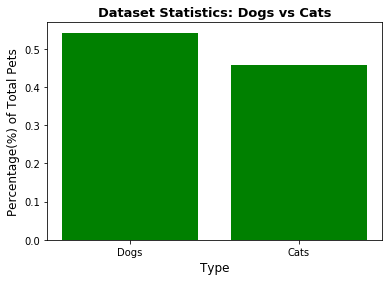

In [19]:
x=['Dogs','Cats']
y=[.542632,.457368]
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats',fontsize=13,fontweight='bold')
plt.xlabel('Type',fontsize=12)
plt.ylabel('Percentage(%) of Total Pets',fontsize=12)
plt.show()

Next, Analyzing Adoption Speed as horizontal graph

Text(0, 0.5, 'Adoption Rate')

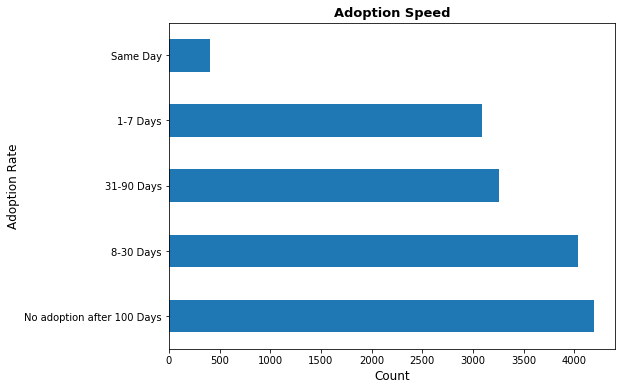

In [20]:
df['adoptionspeed'].value_counts().rename(
    {0:'Same Day',
     1:'1-7 Days',
     2:'8-30 Days',
     3:'31-90 Days',
     4:'No adoption after 100 Days'}).plot(kind='barh',figsize=(8,6))
plt.title('Adoption Speed', fontsize=13,fontweight='bold')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Adoption Rate',fontsize=12)

In [21]:
df['adoptionspeed'].value_counts()

4    4193
2    4031
3    3255
1    3088
0     410
Name: adoptionspeed, dtype: int64

In [22]:
round(len(df.loc[df['adoptionspeed']==4])/len(df),2)

0.28

Sadly, nearly 28% of all pets in our dataset were not adopted after 100 days.
We wanted to find out, is the adoption speed better (with a corresponding smaller value) for dogs or cats?

In [23]:
df.groupby(['type']).agg({'adoptionspeed':'mean'})

,adoptionspeed
type,
1.0,2.615233
2.0,2.398978


This data shows us that cats are more likely to be adopted quicker than dogs.
We found that 28% of all pets are not adopted after 100 days. We decided to filter on several characteristics to see if we could deduce some characteristics which help make pets more likely to be adopted. We filtered on pets who possess all of the following characteristics at the same time - are vaccinated, are dewormed, are sterilized, are either healthy or have only a minor injury, have no adoption fee, and age of less than 1 year.

In [24]:
vaccinated_list=[1]
dewormed_list=[1]
sterilized_list=[1]
health_list=[1,2]
fee_list=[0]
age_list=[1,2,3,4,5,6,7,8,9,10,11,12]

df_filter_adj=df.loc[df['vaccinated'].isin(vaccinated_list)&df['dewormed'].isin(dewormed_list)&
       df['sterilized'].isin(sterilized_list)&df['health'].isin(health_list)&
       df['fee'].isin(fee_list)&df['age'].isin(age_list)]
df_filter_adj['adoptionspeed'].value_counts()/len(df_filter_adj)

4    0.398974
3    0.269744
2    0.220513
1    0.087179
0    0.023590
Name: adoptionspeed, dtype: float64

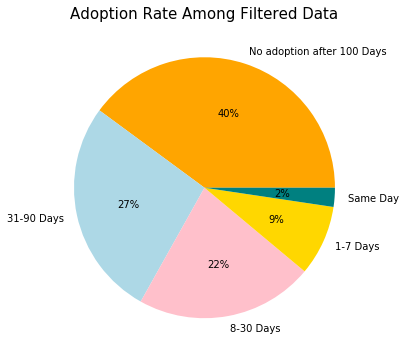

['No adoption after 100 Days',
 '31-90 Days',
 '8-30 Days',
 '1-7 Days',
 'Same Day']

In [25]:
labels=['No adoption after 100 Days','31-90 Days','8-30 Days','1-7 Days','Same Day']
sizes=df_filter_adj['adoptionspeed'].value_counts().values
colors=['orange','lightblue','pink','gold','teal']
explode=[0,0,0,0,0]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(6,6))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct= '%1.0f%%')
plt.title('Adoption Rate Among Filtered Data',fontsize=15)
plt.show()
labels

Text(0, 0.5, 'Distribution')

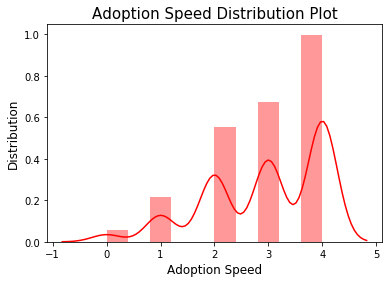

In [26]:
sns.distplot(df_filter_adj['adoptionspeed'],color = "red")
plt.title('Adoption Speed Distribution Plot',fontsize=15)
plt.xlabel('Adoption Speed',fontsize=12)
plt.ylabel('Distribution',fontsize=12)

Surprisingly, 40% of our sliced dataset were not adopted.

Plan Ahead: 

1) split data into two approx equal sized buckets based on outcomes. Bucket 1 -- No adoption after 31+ days  & Bucket 2 -- Adopted within 31 days 

2) predict which row each bucket lands in using two predictors.
        
        a) train test, split data test
        b) run cross validation to tune the hyper paramters of a random forest model on the train dataset
        c) once satisfied, run final model on test data set
        
3)  Add features/inputs to either model, repeat step 2

4)  once satisfied with model to do prediction with two buckets, move to a new model that predicts all of the adoption times seperately by following steps 1 thorugh 3 but with all buckets seperate 

*between all steps do investigations on data, maybe create models for cats and dogs seperately, predictors working for specific type of pet / is a predicator better for a model-- re-run step 2 


# JATIN'S WORK

In [29]:
df['description_length']=df['description'].str.len()

In [31]:
np.corrcoef(df['description_length'],df['adoptionspeed'])[0,1]

-0.010236029488048711

There is not relationship of speed between the length of paragragh assocaited with describing dog.

In [32]:
state=pd.read_csv('Resources/state_labels.csv')
state = state.rename(columns={'StateID':'state','StateName':'state_name'})
state
df = df.merge(state,
        on='state',
        how = 'left')

Text(0, 0.5, 'Mean Adoption Speed')

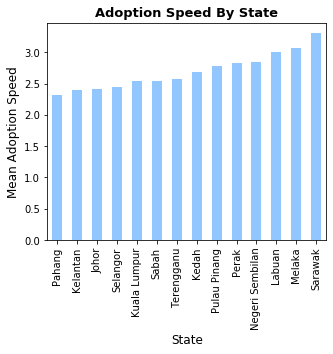

In [33]:
df.groupby('state_name')['adoptionspeed'].mean().sort_values().plot.bar(figsize=(5,4))
plt.title('Adoption Speed By State',fontsize=13,fontweight='bold')
plt.xlabel('State',fontsize=12)
plt.ylabel('Mean Adoption Speed',fontsize=12)

Within all the states, Pahang has the quickiest adoption speed (mean).

We also assessed adoption speed by dog vs. cat within states:

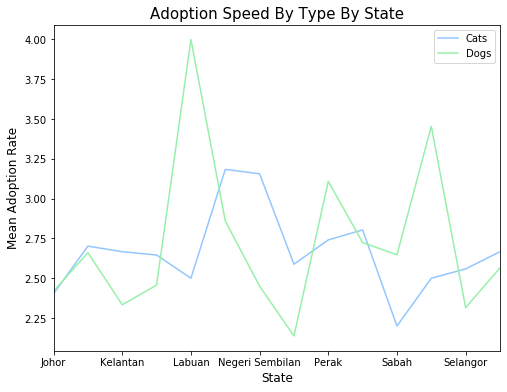

In [34]:
df.loc[df['type']==1,:].groupby('state_name')['adoptionspeed'].mean().plot(figsize=(8,6))
df.loc[df['type']==2,:].groupby('state_name')['adoptionspeed'].mean().plot(figsize=(8,6))
plt.title('Adoption Speed By Type By State',fontsize=15)
plt.xlabel('State',fontsize=12)
plt.ylabel('Mean Adoption Rate',fontsize=12)
plt.legend(['Cats','Dogs'])

Some states have very different preferences for dogs vs cats. For example, Labuan and Sabah have high preference for cats.

We then analyzed the adpotion speed by age for cats and dogs.

In [35]:
df['age_yr']=df['age']/12

In [36]:
df.groupby(['age_yr','type']).agg({'adoptionspeed':'mean'})

adoptionspeed
age_yr    type               
0.000000  1.0        2.166667
          2.0        2.265957
0.083333  1.0        2.314685
          2.0        2.034517
0.166667  1.0        2.423387
...                       ...
15.000000 2.0        3.000000
17.666667 1.0        4.000000
          2.0        3.000000
19.833333 1.0        4.000000
21.250000 1.0        4.000000

[174 rows x 1 columns]

Text(0, 0.5, 'Adoption Speed')

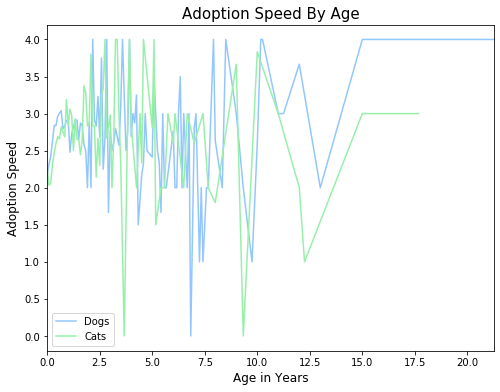

In [37]:
df.loc[df['type']==1,:].groupby('age_yr')['adoptionspeed'].mean().plot(figsize=(8,6))
df.loc[df['type']==2,:].groupby('age_yr')['adoptionspeed'].mean().plot(figsize=(8,6))
plt.title('Adoption Speed By Age',fontsize=15)
plt.legend(['Dogs','Cats'])
plt.xlabel('Age in Years',fontsize=12)
plt.ylabel('Adoption Speed',fontsize=12)

We can see that cats are more likely to be adopted around years 1 and 3, and are adopted quicker than dogs after age 4. Unfortunately dogs have a high chance of not being adopted after year 5.



In [22]:
#split dataframes into -- Bucket 1) No adoption after 31+ days & Bucket 2) Adopted within 31 days

#Adotption Speed Legend
#0:'Same Day',
#1:'1-7 Days',
#2:'8-30 Days',
#3:'31-90 Days',
#4:'No adoption after 100 Days'

df_adoption_before_31_days = df[df['adoptionspeed'] <= 2]
df_adoption_after_31_days = df[df['adoptionspeed'] >= 3]

#Checking if the split worked
df_adoption_after_31_days['adoptionspeed'].value_counts()

4    4193
3    3255
Name: adoptionspeed, dtype: int64

In [23]:
# Adding another column with two buckets, where bucket 1 = adoption_before_31_days & bucket 2 = df_adoption_after_31_days

#Adotption Speed Legend
#0:'Same Day',
#1:'1-7 Days',
#2:'8-30 Days',
#3:'31-90 Days',
#4:'No adoption after 100 Days'

# bucket 1 = adoption_before_31_days  --> value is 0
# bucket 1 = adoption_after_31_days  --> value is 1
    
df['filter_adoptionspeed_2'] = np.where(df['adoptionspeed'] <= 2, '0', '1')
df.head()

,type,age,breed1,breed2,gender,color1,color2,color3,maturitysize,furlength,...,quantity,fee,state,rescuerid,videoamt,description,petid,photoamt,adoptionspeed,filter_adoptionspeed_2
0,2.0,3,299,0,1.0,1,7,0,1,1,...,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2,0
1,2.0,1,265,0,1.0,1,2,0,2,2,...,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0,0
2,1.0,1,307,0,1.0,2,7,0,2,2,...,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3,1
3,1.0,4,307,0,2.0,1,2,0,2,1,...,1,150.0,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2,0
4,1.0,1,307,0,1.0,1,0,0,2,1,...,1,0.0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2,0


In [49]:
subset_of_columns = df[["gender","vaccinated","dewormed","sterilized","health"]]
X = pd.get_dummies(subset_of_columns,columns=["gender","vaccinated","dewormed","sterilized","health"])
y = df["filter_adoptionspeed_2"]
print(X.shape, y.shape)
print(X)

(14977, 15) (14977,)
       gender_1.0  gender_2.0  gender_3.0  vaccinated_1  vaccinated_2  \
0               1           0           0             0             1   
1               1           0           0             0             0   
2               1           0           0             1             0   
3               0           1           0             1             0   
4               1           0           0             0             1   
...           ...         ...         ...           ...           ...   
14985           1           0           0             0             0   
14987           0           1           0             1             0   
14988           0           0           1             0             1   
14989           0           0           1             1             0   
14991           0           1           0             1             0   

       vaccinated_3  dewormed_1  dewormed_2  dewormed_3  sterilized_1  \
0                 0          

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_train.count()

gender_1.0      11232
gender_2.0      11232
gender_3.0      11232
vaccinated_1    11232
vaccinated_2    11232
vaccinated_3    11232
dewormed_1      11232
dewormed_2      11232
dewormed_3      11232
sterilized_1    11232
sterilized_2    11232
sterilized_3    11232
health_1        11232
health_2        11232
health_3        11232
dtype: int64

In [51]:
X_test.count()

gender_1.0      3745
gender_2.0      3745
gender_3.0      3745
vaccinated_1    3745
vaccinated_2    3745
vaccinated_3    3745
dewormed_1      3745
dewormed_2      3745
dewormed_3      3745
sterilized_1    3745
sterilized_2    3745
sterilized_3    3745
health_1        3745
health_2        3745
health_3        3745
dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
logisticRegression = LogisticRegression()
logisticRegression.fit(X = X_train,y=y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# Predict!
y_predicted = logisticRegression.predict(X_test)
print(y_predicted)

['0' '0' '0' ... '0' '1' '0']


In [54]:
logisticRegression.score(X_test,y_test)

0.5823765020026702